In [1]:
!pip install tensorflow matplotlib seaborn

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import shutil

In [3]:
# Define dataset directories
train_dir = "train"
val_dir = "val"
test_dir = "test"

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 12401 files belonging to 4 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3098 files belonging to 4 classes.


# **Building The Model**

In [6]:
cnn = tf.keras.models.Sequential()

**Building Convolution Layer**

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\gtyor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

**Compiling and Training Phase**

In [17]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Callback to save best model based on val_loss
checkpoint = ModelCheckpoint(
    filepath='CornDisease_best_val_loss.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=[checkpoint]
)

Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6906 - loss: 0.7712  
Epoch 1: val_loss improved from inf to 0.24333, saving model to CornDisease_best_val_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accuracy: 0.6910 - loss: 0.7704 - val_accuracy: 0.9158 - val_loss: 0.2433
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9213 - loss: 0.2325  
Epoch 2: val_loss improved from 0.24333 to 0.22515, saving model to CornDisease_best_val_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 529s 1s/step - accuracy: 0.9213 - loss: 0.2325 - val_accuracy: 0.9112 - val_loss: 0.2251
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9315 - loss: 0.1897  
Epoch 3: val_loss improved from 0.22515 to 0.16764, saving model to CornDisease_best_val_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 462s 1s/step - accuracy: 0.9315 - loss: 0.1897 - val_accuracy: 0.9419 - val_loss: 0.1676
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9484 - loss: 0.1462  
Ep

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

388/388 ━━━━━━━━━━━━━━━━━━━━ 113s 291ms/step - accuracy: 0.9755 - loss: 0.0685
Training accuracy: 0.9788726568222046
97/97 ━━━━━━━━━━━━━━━━━━━━ 30s 313ms/step - accuracy: 0.9461 - loss: 0.2584
Validation accuracy: 0.9448031187057495


In [21]:
cnn.save('cornDisease.keras')

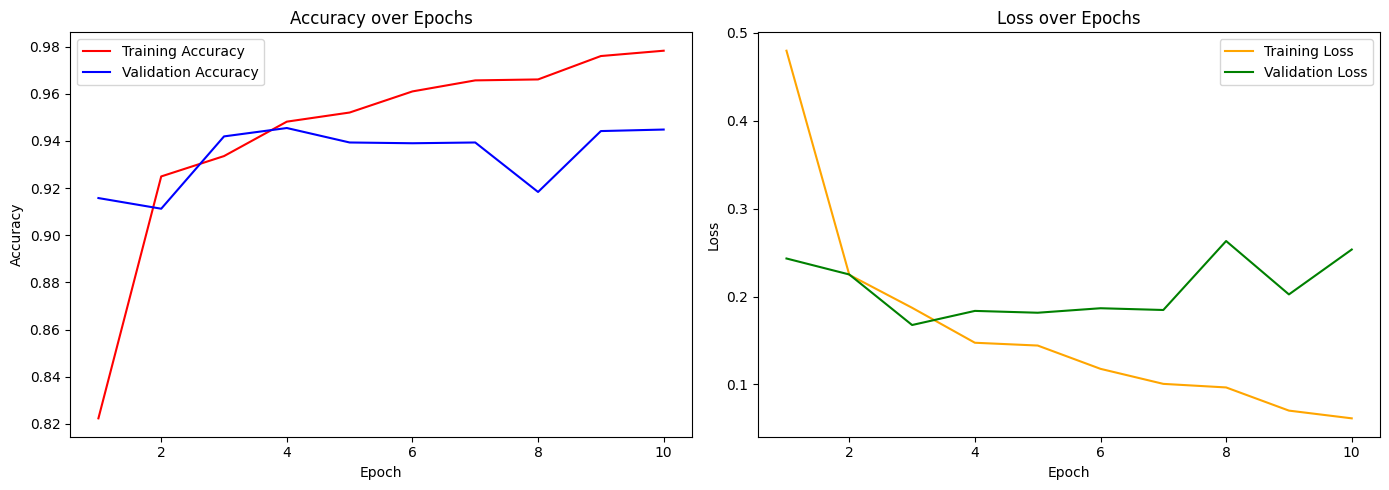

In [23]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 11)]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# --- Accuracy plot ---
axs[0].plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
axs[0].plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
axs[0].set_title('Accuracy over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# --- Loss plot ---
axs[1].plot(epochs, training_history.history['loss'], color='orange', label='Training Loss')
axs[1].plot(epochs, training_history.history['val_loss'], color='green', label='Validation Loss')
axs[1].set_title('Loss over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3098 files belonging to 4 classes.


In [26]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

3098/3098 ━━━━━━━━━━━━━━━━━━━━ 73s 24ms/step 


In [27]:
Y_true

<tf.Tensor: shape=(3098,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [28]:
predicted_categories

<tf.Tensor: shape=(3098,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [30]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

   Corn___Common_Rust       0.95      0.98      0.97       792
Corn___Gray_Leaf_Spot       0.94      0.87      0.90       713
       Corn___Healthy       0.96      0.99      0.98       781
   Corn___Leaf_Blight       0.93      0.93      0.93       812

             accuracy                           0.94      3098
            macro avg       0.94      0.94      0.94      3098
         weighted avg       0.94      0.94      0.94      3098



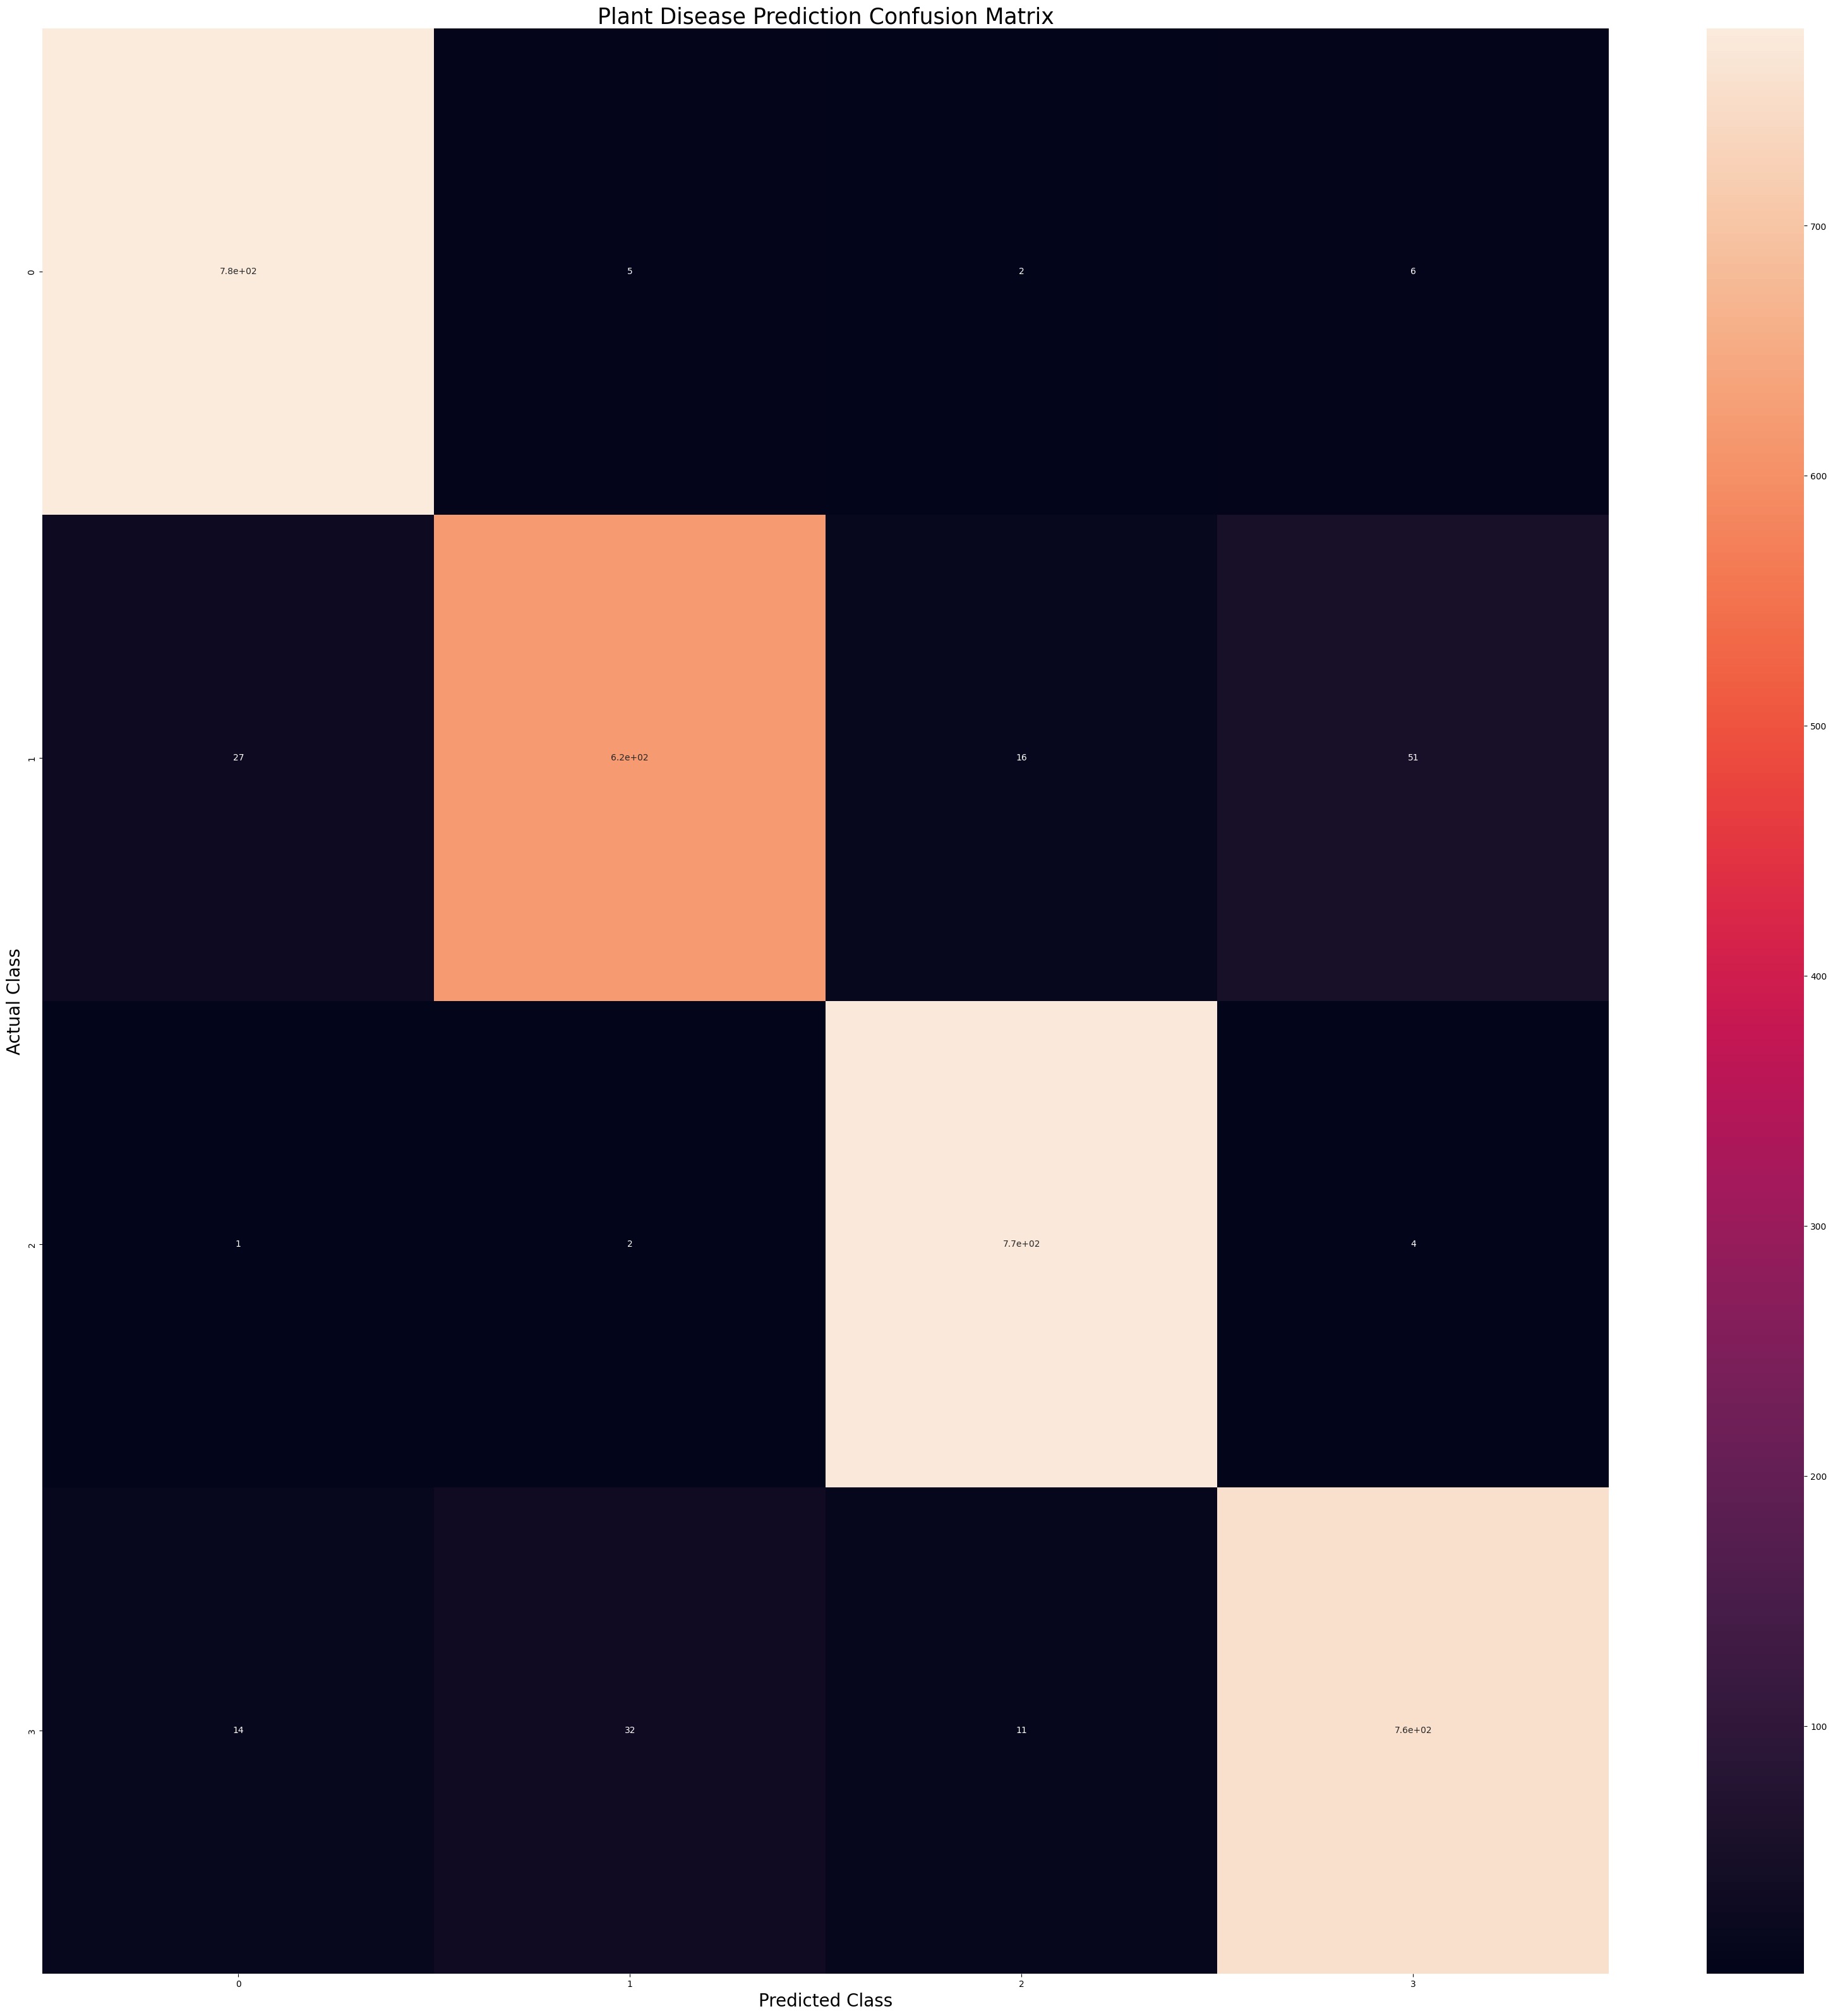

In [31]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

Testing: CommonRust.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


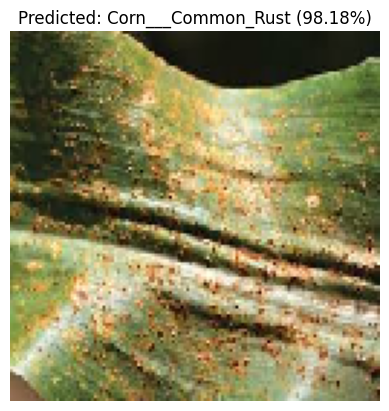

Testing: CommonRust1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


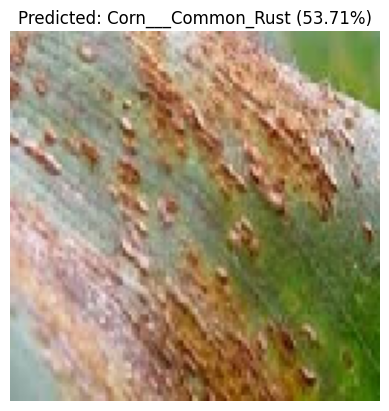

Testing: GrayLeaf (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


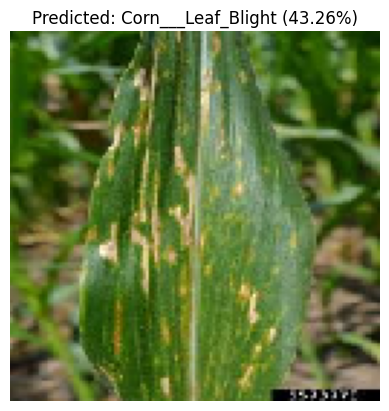

Testing: GrayLeaf1.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


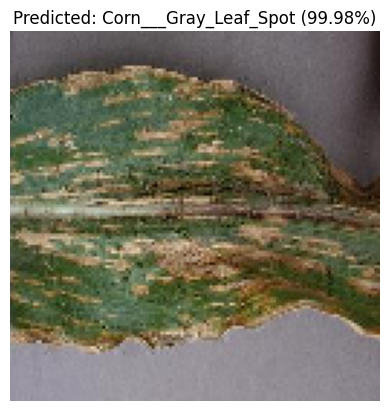

Testing: GrayLeaf2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


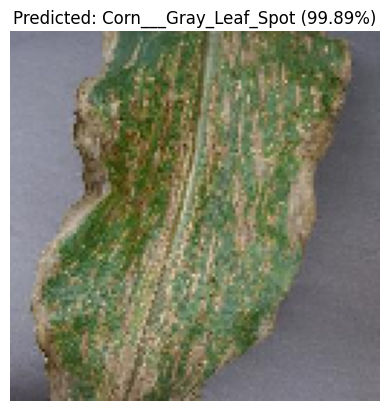

Testing: GrayLeaf3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


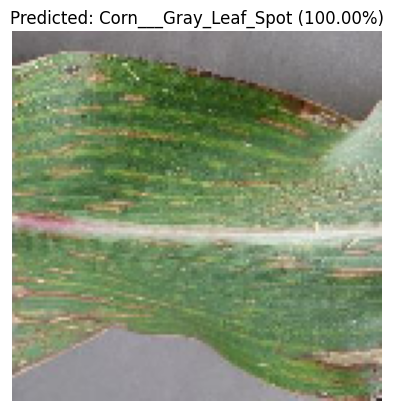

Testing: GrayLeaf4.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


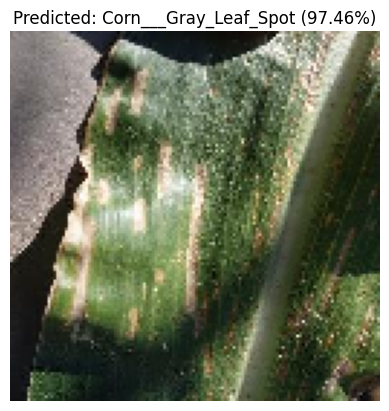

Testing: GrayLeaf5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


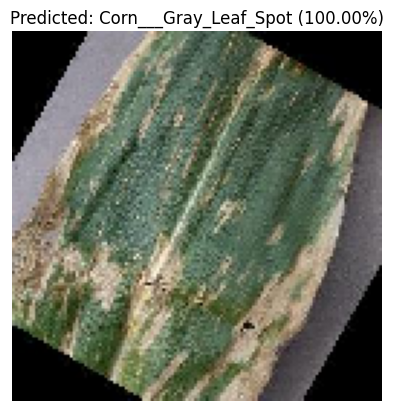

Testing: Healthy1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


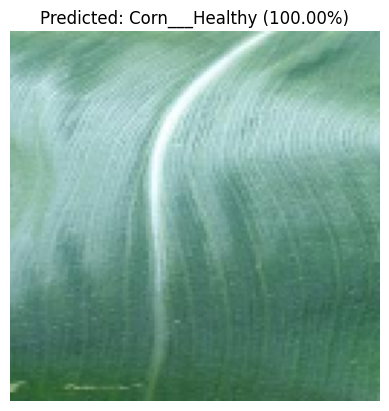

Testing: Healthy2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


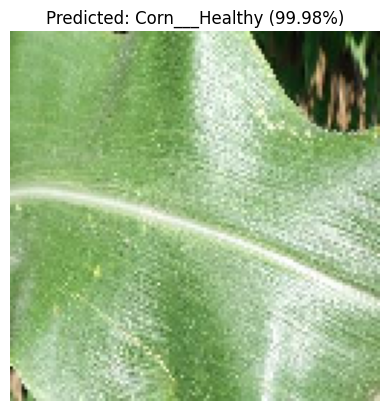

Testing: Healthy3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


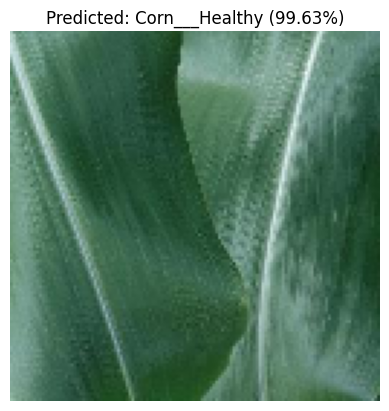

Testing: Healthy4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


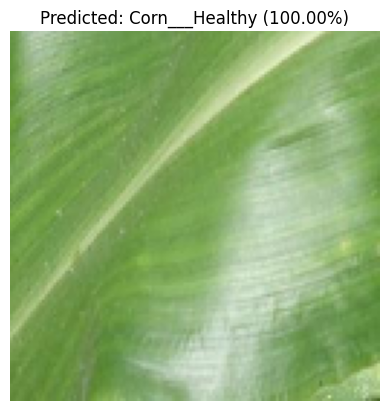

Testing: Healthy5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


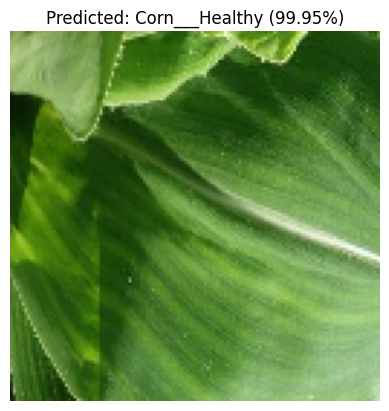

Testing: healthy7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


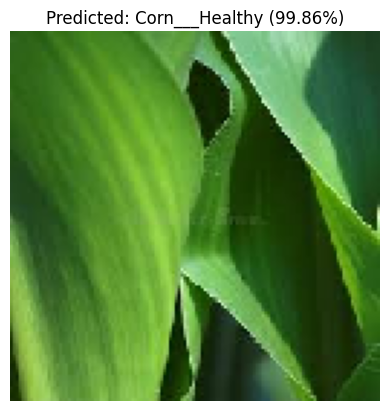

Testing: healthy8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


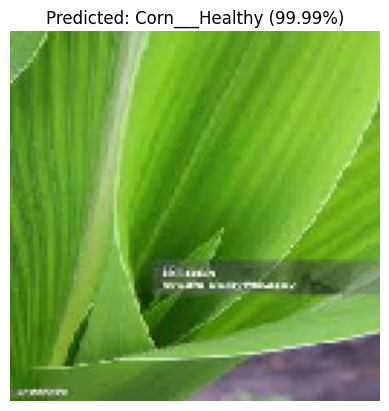

Testing: LeafBlight6 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


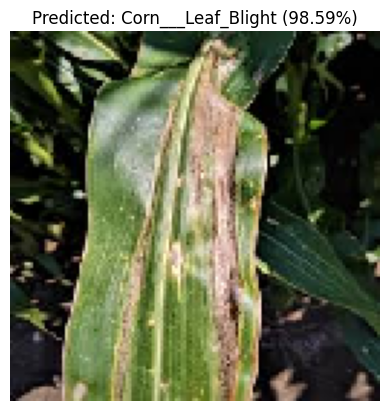

Testing: LeafBlight6 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


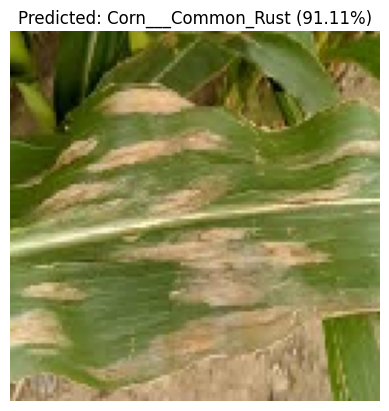

Testing: LeafBlight6 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


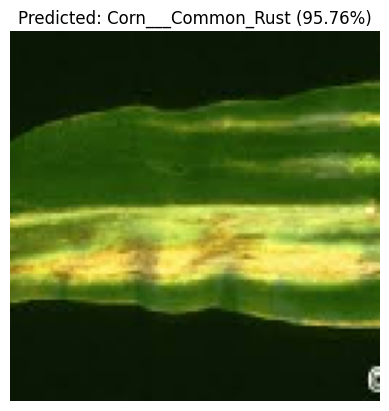

Testing: LeaftBlight1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


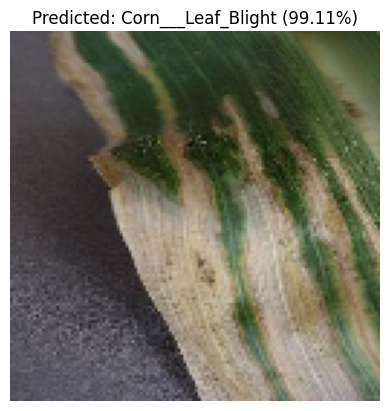

Testing: LeaftBlight2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


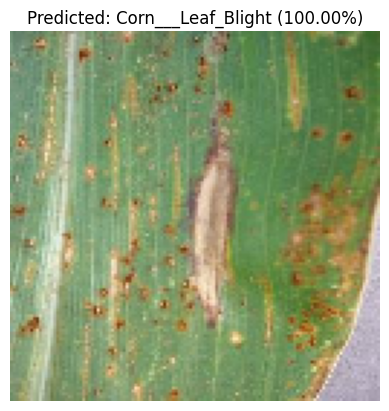

Testing: LeaftBlight3.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


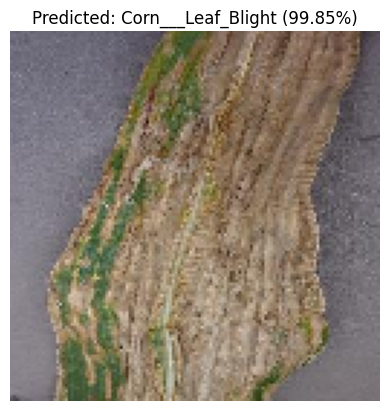

Testing: LeaftBlight4.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


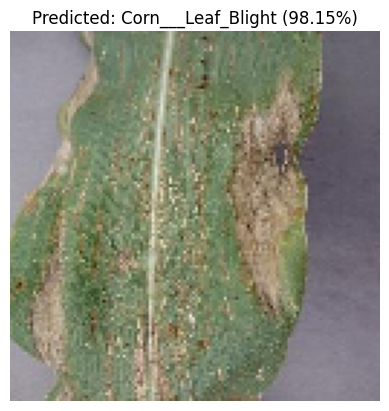

Testing: LeaftBlight5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


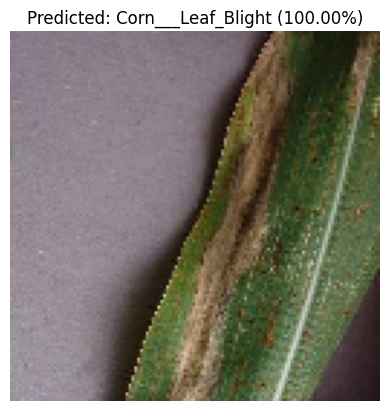

Testing: LeaftBlight6.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


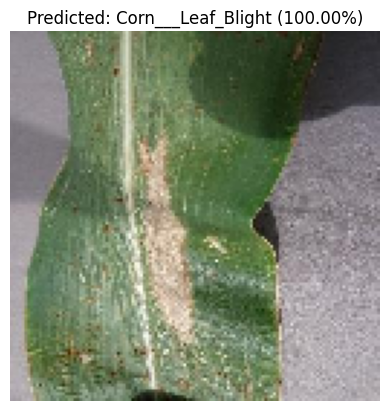

Testing: RS_Rust 1563(1).JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


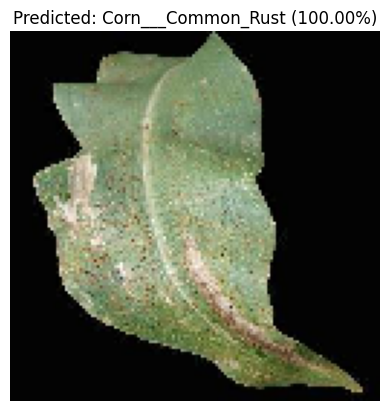

Testing: RS_Rust 1601(1).JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


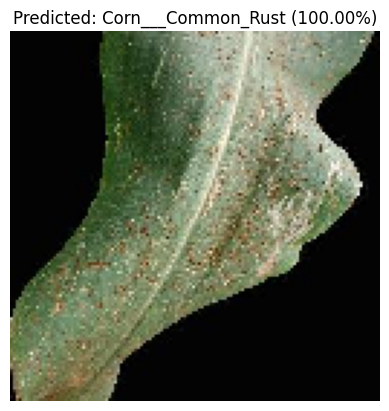

Testing: RS_Rust 1608_flipLR(1).JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


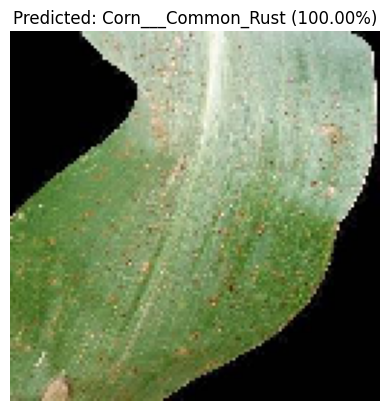

Testing: RS_Rust 1648.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


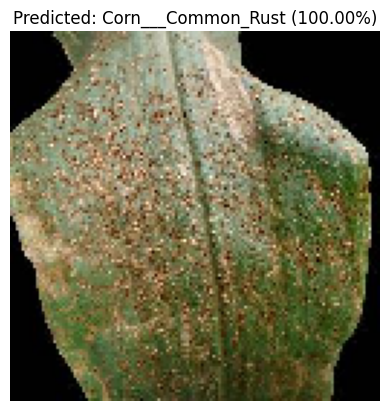

Testing: RS_Rust 1651.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


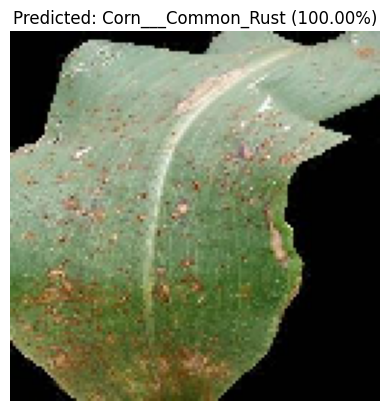

Testing: RS_Rust 1715_flipLR.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


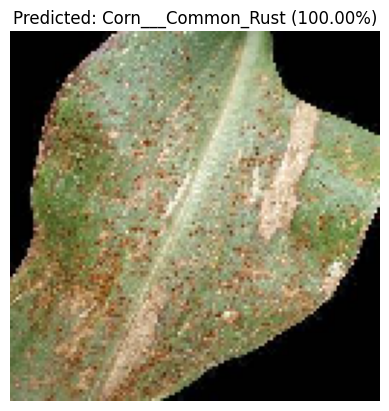

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model = tf.keras.models.load_model('CornDisease.keras')

# Define image size (must match what was used during training)
image_size = (128, 128)

# Path to test images
test_dir = "test"

# Get class names from model (if saved with metadata or known ahead of time, define here)
# Example: manually define if needed
class_names = ['Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Corn___Leaf_Blight']

# Function to load image
def load_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict and show result
def predict_image(img_path):
    img_array = load_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    img = image.load_img(img_path, target_size=image_size)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()

# Test each image in the test folder
for file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, file)
    if os.path.isfile(img_path) and file.lower().endswith(('.jpg', '.jpeg', '.png')):
        print(f"Testing: {file}")
        predict_image(img_path)
